In [1]:
dataset_path = "../../yolo-testing/datasets/bdd100k"
train_images_path = f"{dataset_path}/images/train"
val_images_path = f"{dataset_path}/images/val"
train_labels_path = f"{dataset_path}/labels/bdd100k_labels_images_train.json"
val_labels_path = f"{dataset_path}/labels/bdd100k_labels_images_val.json"

In [19]:
import json

print("loading training labels")
with open(train_labels_path) as f:
    train_labels = json.load(f)

print(train_labels[:2])

loading training labels
[{'name': '0000f77c-6257be58.jpg', 'attributes': {'weather': 'clear', 'scene': 'city street', 'timeofday': 'daytime'}, 'timestamp': 10000, 'labels': [{'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1125.902264, 'y1': 133.184488, 'x2': 1156.978645, 'y2': 210.875445}, 'id': 0}, {'category': 'traffic light', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'green'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1156.978645, 'y1': 136.637417, 'x2': 1191.50796, 'y2': 210.875443}, 'id': 1}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1101.731743, 'y1': 211.122087, 'x2': 1170.79037, 'y2': 233.566141}, 'id': 2}, {'category': 'traffic sign', 'attributes': {'occluded': Fal

In [20]:
print("loading validation labels")
with open(val_labels_path) as f:
    val_labels = json.load(f)

print(val_labels[:2])

loading validation labels
[{'name': 'b1c66a42-6f7d68ca.jpg', 'attributes': {'weather': 'overcast', 'scene': 'city street', 'timeofday': 'daytime'}, 'timestamp': 10000, 'labels': [{'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 1000.698742, 'y1': 281.992415, 'x2': 1040.626872, 'y2': 326.91156}, 'id': 0}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 214.613695, 'y1': 172.190058, 'x2': 274.505889, 'y2': 229.586743}, 'id': 1}, {'category': 'traffic sign', 'attributes': {'occluded': False, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 797.314833, 'y1': 313.186265, 'x2': 829.756437, 'y2': 341.884608}, 'id': 2}, {'category': 'traffic sign', 'attributes': {'occluded': False

In [21]:
total_val = len(val_labels)
print(total_val)

total_train = len(train_labels)
print(total_train)

10000
69863


In [8]:
print("number of labels with attribute timeofday==daytime in val_labels")
num_day_val_labels = len([i for i in val_labels if i['attributes']['timeofday'] == "daytime"])
print(num_day_val_labels)

print("number of labels with attribute timeofday==night in val_labels")
num_night_val_labels = len([i for i in val_labels if i['attributes']['timeofday'] == "night"])
print(num_night_val_labels)

print("Other times of day: ", total_val - num_day_val_labels - num_night_val_labels)

print("number of labels with attribute timeofday==daytime in train_labels")
num_day_train_labels = len([i for i in train_labels if i['attributes']['timeofday'] == "daytime"])
print(num_day_train_labels)

print("number of labels with attribute timeofday==night in train_labels")
num_night_train_labels = len([i for i in train_labels if i['attributes']['timeofday'] == "night"])
print(num_night_train_labels)

other_val_labels = total_val - num_day_val_labels - num_night_val_labels
print("Other times of day val ", other_val_labels)
other_train_labels = total_train - num_day_train_labels - num_night_train_labels 
print("Other times of day train ", other_train_labels)

number of labels with attribute timeofday==daytime in val_labels
5258
number of labels with attribute timeofday==night in val_labels
3929
Other times of day:  813
number of labels with attribute timeofday==daytime in train_labels
36728
number of labels with attribute timeofday==night in train_labels
27971
Other times of day val  813
Other times of day train  5164


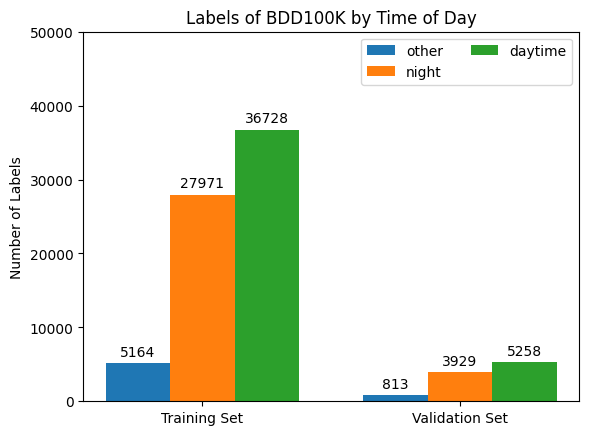

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ('Training Set','Validation Set')
daytime_distribution = {
    "other": (other_train_labels, other_val_labels),
    "night": (num_night_train_labels, num_night_val_labels),
    "daytime": (num_day_train_labels, num_day_val_labels),
}

# Bar width and positions
bar_width = 0.25
x = np.arange(len(categories))
multiplier = 0

# Create stacked bar chart
fig, ax = plt.subplots()
for time, number in daytime_distribution.items():
    offset = bar_width * multiplier
    rects = ax.bar(x + offset, number, bar_width, label=time)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Labels and title
ax.set_ylabel('Number of Labels')
ax.set_title('Labels of BDD100K by Time of Day')
ax.set_xticks(x + bar_width, categories)
ax.legend(loc="upper right", ncols=2)
ax.set_ylim(0, 50000)


# Show plot
plt.show()

In [37]:
from tqdm import tqdm 

cls2id = {
    "person": 0,
    "rider": 1,
    "car": 2,
    "bus": 3,
    "truck": 4,
    "bike": 5,
    "motor": 6,
    "tl_green": 7,
    "tl_red": 8,
    "tl_yellow": 9,
    "tl_none": 10,
    "traffic_sign": 11,
    "train": 12
}

out_train_labels_path = f"{dataset_path}/labels/train"
out_val_labels_path = f"{dataset_path}/labels/val"

img_width, img_height = 1280, 720

def wrangle_labels(images_in, save_path, save=True):
    print(f"loaded {len(images_in)}, saving to: {save_path}")
    for image in tqdm(images_in):
        annotations = list()
        filename = image["name"][:-4]
        out_file = f"{save_path}/{filename}.txt"
        for label in image["labels"]:
            category=label['category']
            if (category == "traffic light"):
                color = label['attributes']['trafficLightColor']
                category = "tl_" + color
            if category in cls2id.keys():
                x1 = label['box2d']['x1']
                y1 = label['box2d']['y1']
                x2 = label['box2d']['x2']
                y2 = label['box2d']['y2']
                x_center = ((x1 + x2) / 2) / img_width
                y_center = ((y1 + y2) / 2) / img_height
                width = (x2 - x1) / img_width
                height = (y2 - y1) / img_height
                category_id = cls2id[category]
                annotations.append(f"{category_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
                # debug print
                # print(f"x1: {x1}, x2: {x2}, y1: {y1}, y2: {y2}, x_cent: {x_center}, y_cent: {y_center}, width")
        # save file
        if (save):
            with open(out_file, "w") as f:
                f.writelines('\n'.join(annotations))

In [ ]:
wrangle_labels(train_labels, out_train_labels_path, False )

loaded 69863, saving to: ../../yolo-testing/datasets/bdd100k/labels/train


100%|██████████| 69863/69863 [00:07<00:00, 9074.92it/s]


In [ ]:
wrangle_labels(val_labels, out_val_labels_path, False )

loaded 10000, saving to: ../../yolo-testing/datasets/bdd100k/labels/val


100%|██████████| 10000/10000 [00:01<00:00, 8675.11it/s]


In [40]:
# Remove images that don't have any labels
import os

def filter_images(image_path, label_path):
    count = 0
    for image in os.listdir(image_path):
        image_name = os.path.splitext(image)[0]
        if (image_name == ".DS_Store"):
            continue
        if (image_name == "testA" or image_name == "testB"
            or image_name == "trainA" or image_name == "trainB"):
            continue
        label_destination = f"{label_path}/{image_name}.txt"
        image_destination = f"{image_path}/{image_name}.jpg"
        if not os.path.isfile(label_destination):
            print(f"DOES NOT EXIST: {label_destination}")
            print(f"REMOVING: {image_destination}")
            os.remove(image_destination)
            count += 1
    print(count)

filter_images(val_images_path, f"{dataset_path}/labels/val")
filter_images(train_images_path, f"{dataset_path}/labels/train")

0
0


In [11]:
import os
def filter_labels(label_path, image_path):
    count = 0
    for label in os.listdir(label_path):
        label_name = os.path.splitext(label)[0]
        if (label_name == ".DS_Store"):
            continue
        label_destination = f"{label_path}/{label_name}.txt"
        image_destination = f"{image_path}/{label_name}.jpg"
        if not os.path.isfile(image_destination):
            os.remove(label_destination)
            count += 1
    print(count)

In [12]:
dataset_path = "../../yolo-testing/datasets/bdd100k_night"
filter_labels(f"{dataset_path}/labels/val", f"{dataset_path}/images/val")
filter_labels(f"{dataset_path}/labels/train", f"{dataset_path}/images/train")

6071
41892


In [14]:
# Print number of empty labels
dataset_path = "../../yolo-testing/datasets/bdd100k_night_v2"
def count_empty_labels(label_path):
    count = 0
    for label in os.listdir(label_path):
        label_name = os.path.splitext(label)[0]
        if (label_name == ".DS_Store"):
            continue
        label_destination = f"{label_path}/{label_name}.txt"
        with open(label_destination, "r") as f:
            if not f.readlines():
                count += 1
    print(count)

count_empty_labels(f"{dataset_path}/labels/train")
count_empty_labels(f"{dataset_path}/labels/val")

121
19
